# Analyzing Marketing Campaigns

*<u>The goal of the project is :</u>*
  
to transalte common business questions into measurable outcomes like:
1. How did this campaign perform?
2. How many users sunscribed in each channel?
3. Why is a particular channel underperforming?"
4. Why is a particular channel underperforming? 
5. should we continue investing in this marketing channel?


*<u>About the CSV File:</u>*
  
*The marketing csv file is a fictitious  dataset containing information about tracking a marketing campaign's effectiveness, user conversions, and retention across different channels and user segments.*
  

|Column Name | Description|
|------------|------------|
|user_id|Identifier for each user (can have multiple entries per user to track their interactions with different marketing messages over time)|
|date_served|The date when the marketing message/ad was shown to the user|
|marketing_channel|The channel through which the marketing message was delivered (Instagram, Facebook, House Ads, Email, Push)|
|variant|The type of marketing experiment (control or personalization)|
|converted|Boolean flag indicating if the user converted (TRUE/FALSE)|
|language_displayed|The language in which the marketing message was displayed|
|language_preferred|The user's preferred language|
|age_group|Age category of the user (0-18 years, 19-24 years, etc.)|
|date_subscribed|The date when the user subscribed to the service|
|date_canceled|The date when the user canceled their subscription (if applicable)|
|subscribing_channel|The channel through which the user actually completed their subscription|
|is_retained|Boolean flag indicating if the user remained subscribed (TRUE/FALSE)|

In [109]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

import warnings
warnings.simplefilter('ignore')

## Loading the dataset

In [110]:
marketing = pd.read_csv("marketing.csv")
marketing.head()
marketing.info()   # print information about df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Data Cleaning

In [111]:
booleans = ['converted', 'is_retained']
marketing[booleans] = marketing[booleans].astype('bool')

# ensure that date columns are converted into datetime format
dates = ['date_served', 'date_subscribed', 'date_canceled']
marketing[dates] = marketing[dates].apply(pd.to_datetime)   # when dealing with datetime formats, the apply() function is more suitable than astype()

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
dtypes: bool(2), datetime64[ns](3), object(7)
memory usage: 803.9+ KB


In [112]:
# after converting dates into a datetime, I can then extract the Day of week (DoW) from date subscribed

marketing['DoW_subscribed'] = marketing['date_subscribed'].dt.dayofweek  # starting with Monday=0
marketing['day_Subscribed'] = marketing['date_subscribed'].dt.day_name()

marketing['DoW_served'] = marketing['date_served'].dt.dayofweek
marketing['day_served'] = marketing['date_served'].dt.day_name()

marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW_subscribed,day_Subscribed,DoW_served,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,Monday,0.0,Monday
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,Monday,0.0,Monday
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,Monday,0.0,Monday
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,Monday,0.0,Monday
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,Monday,0.0,Monday


In [113]:
# creating a new boolean column
marketing['is_house_ads'] = np.where(
    marketing['marketing_channel'] == 'House Ads',
    True,
    False
)
marketing['is_house_ads'].value_counts()

is_house_ads
False    5304
True     4733
Name: count, dtype: int64

In [114]:
# counting nulls in each column
marketing.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained               0
DoW_subscribed         8181
day_Subscribed         8181
DoW_served               16
day_served               16
is_house_ads              0
dtype: int64

<u>Removing these null values would bias the analysis.</u>
  
The null values in date_canceled (9460 nulls) and date_subscribed (8181 nulls) likely represent users who either:
- Haven't canceled their subscription yet **(active users)**
- Haven't subscribed at all **(non-converted users)** 


## EDA

##### value counts for each column 

Skipping user_id: Too many unique values in user_id column.
Skipping date_served: Too many unique values in date_served column.


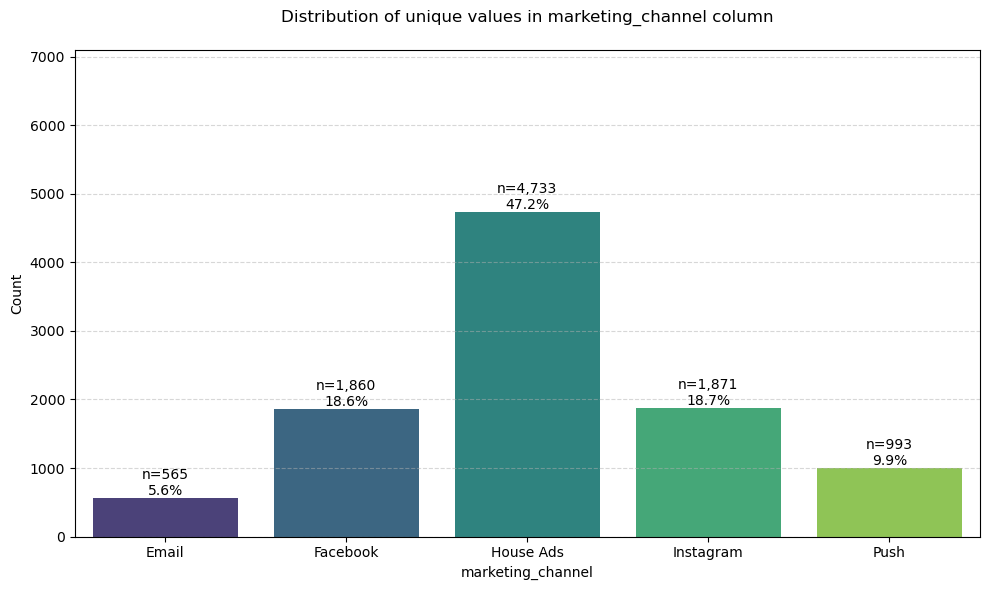

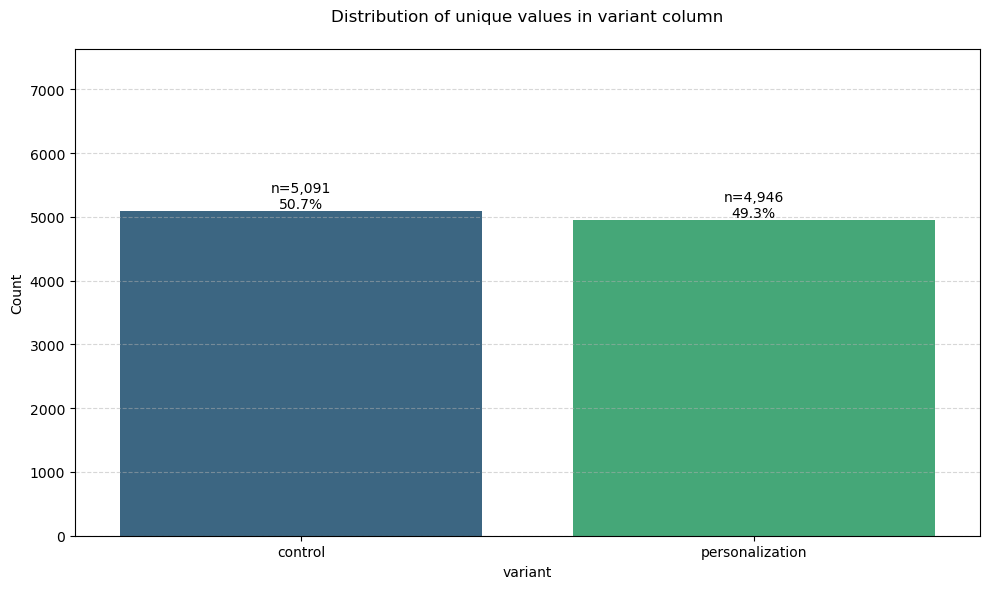

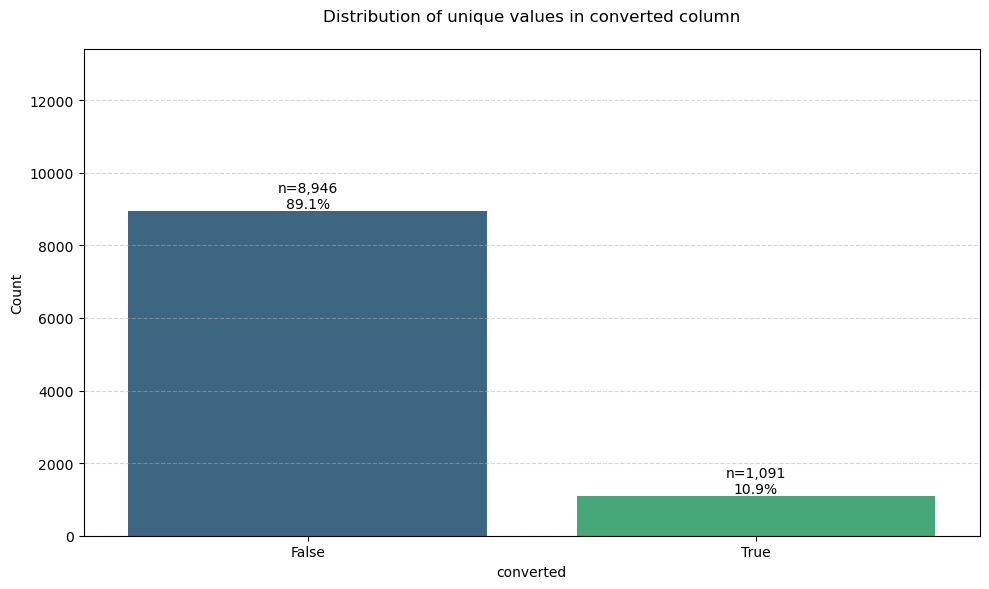

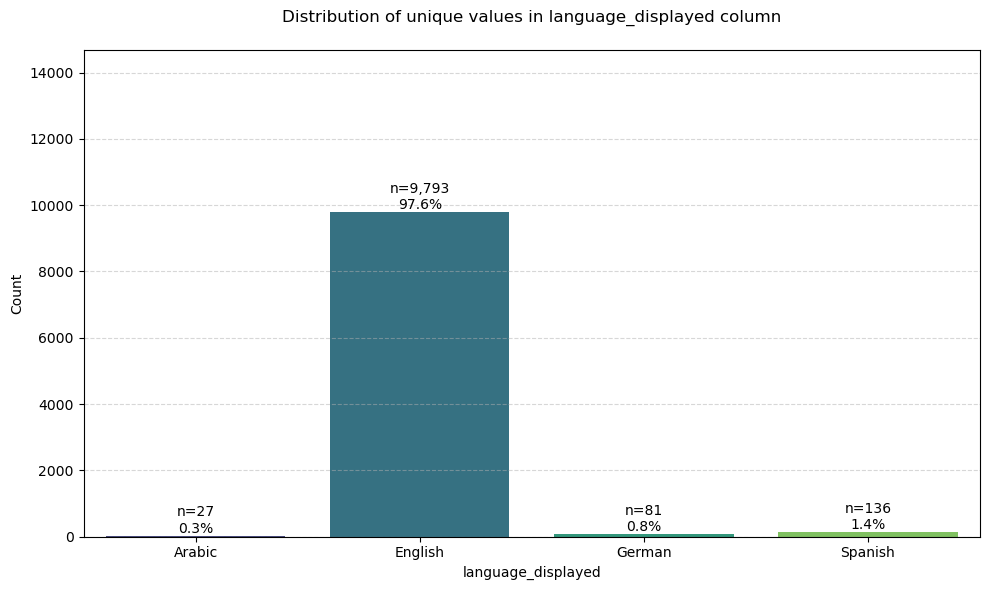

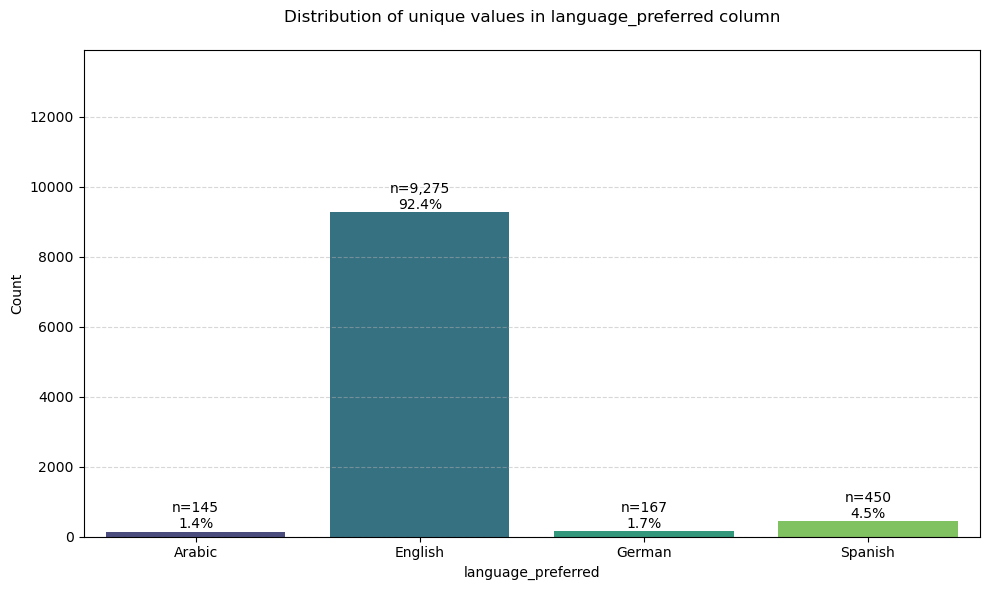

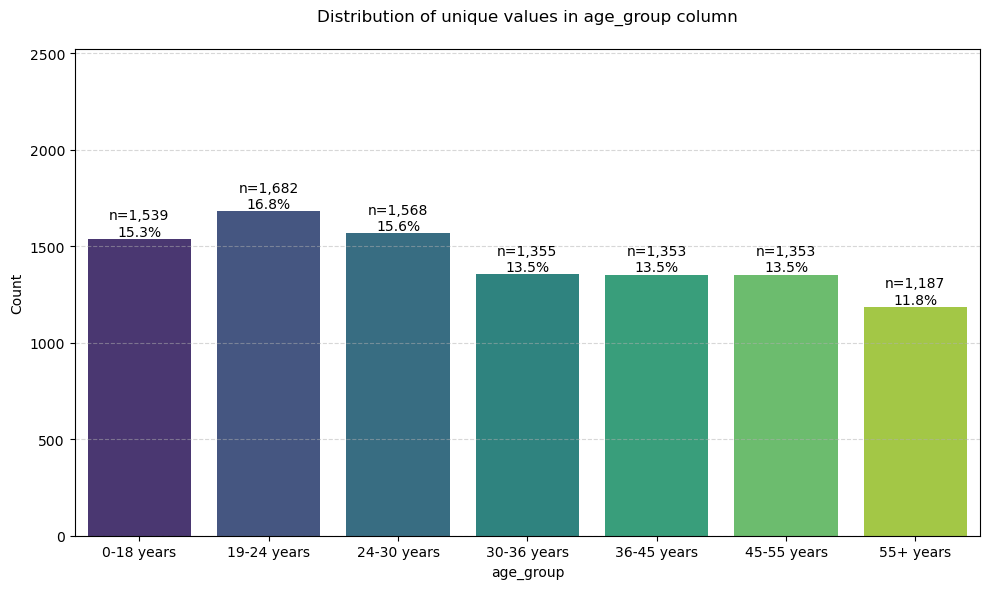

Skipping date_subscribed: Too many unique values in date_subscribed column.
Skipping date_canceled: Too many unique values in date_canceled column.


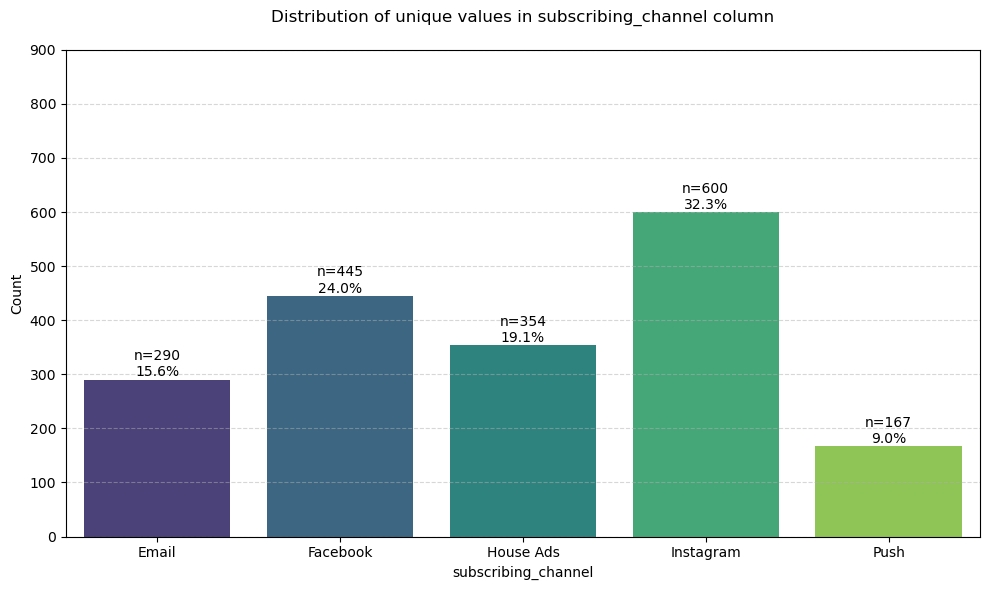

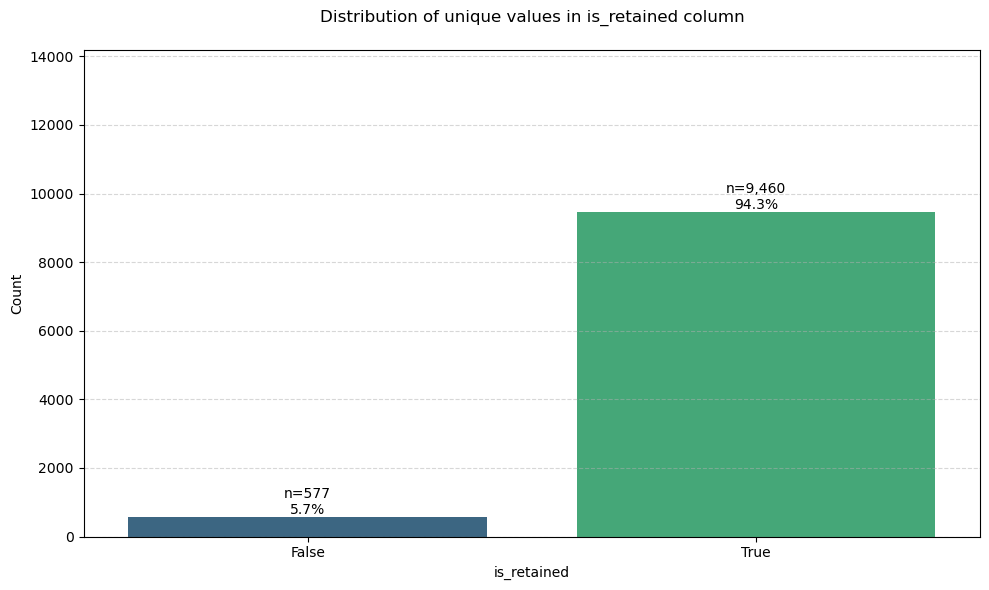

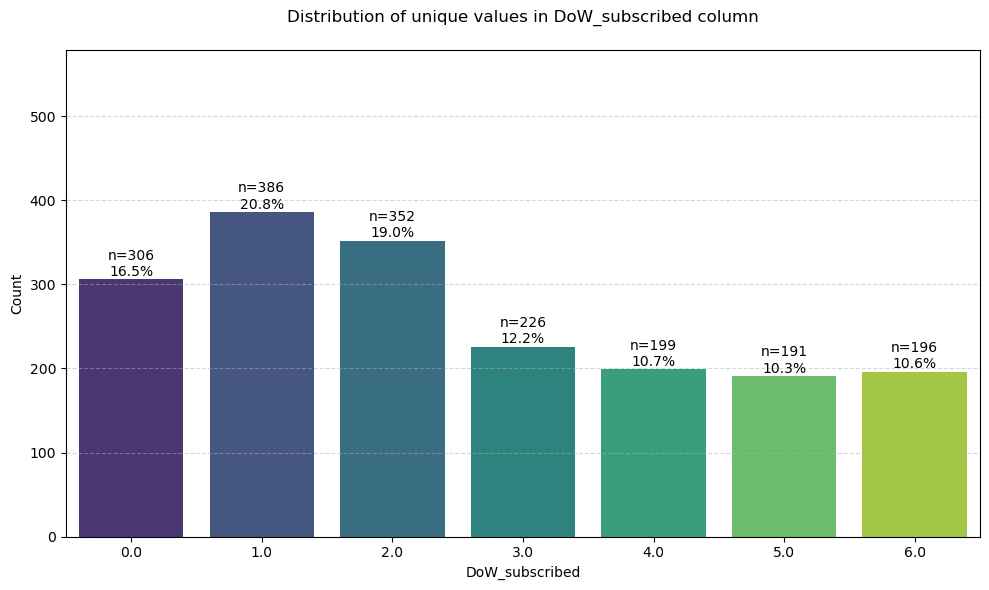

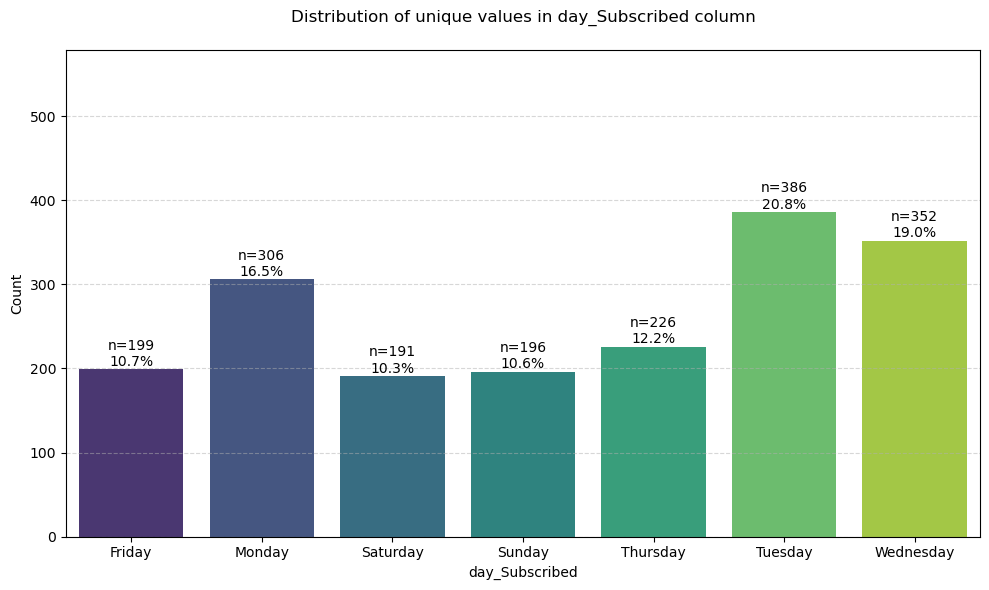

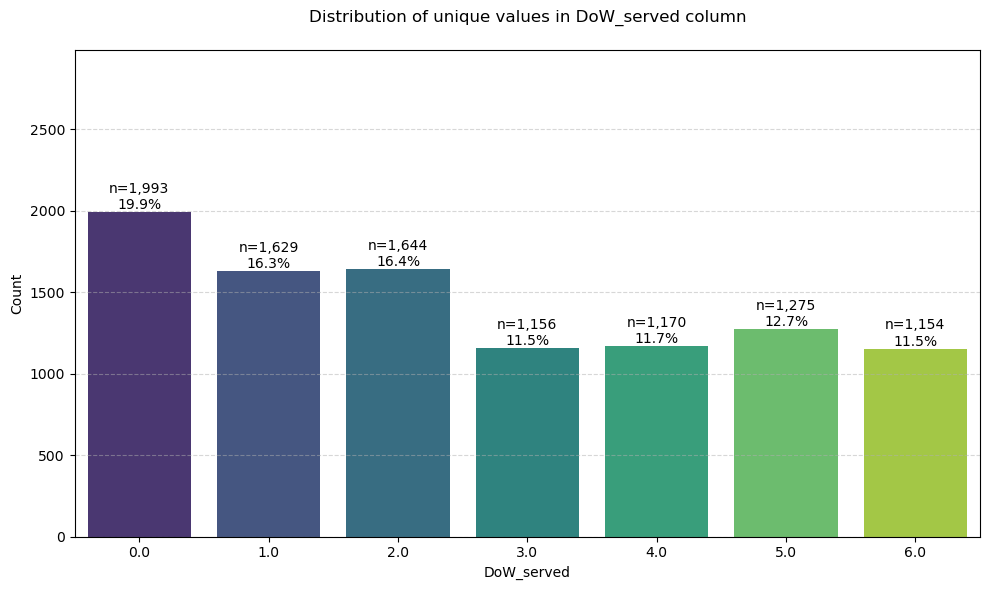

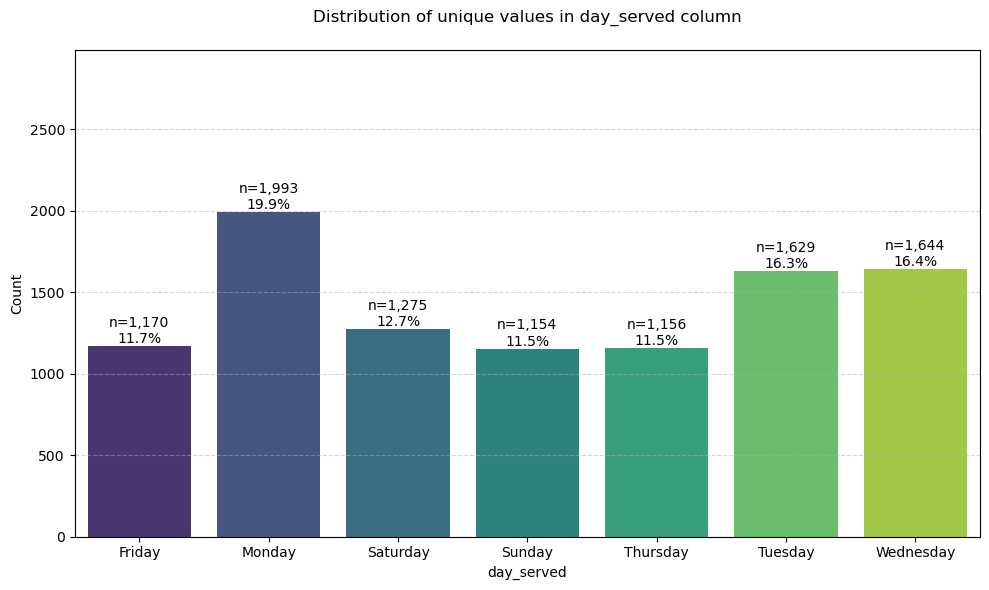

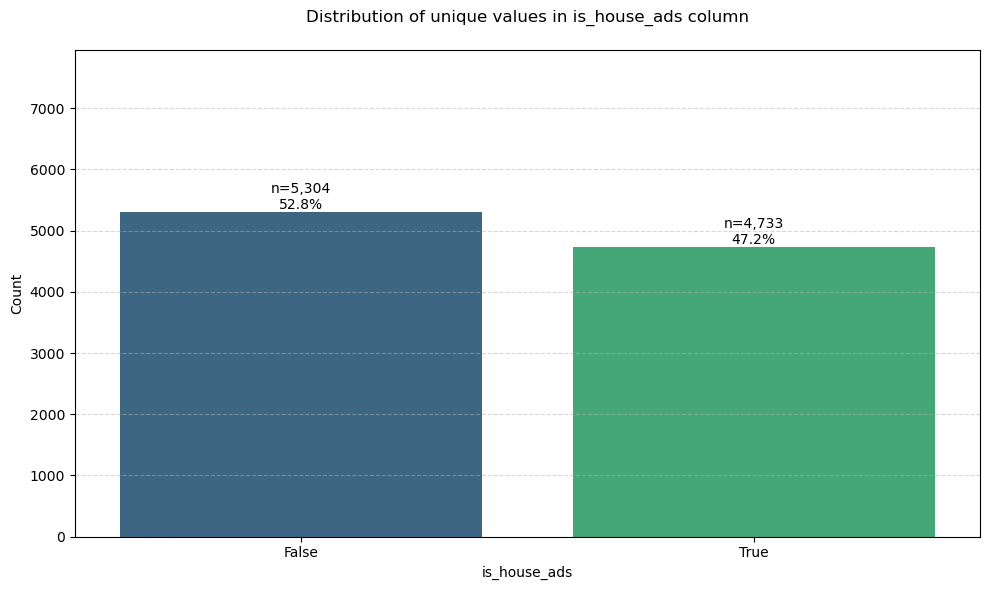

In [115]:
def plot_value_counts(df):
    for column in df.columns:
        try:
            plt.figure(figsize=(10, 6))  

            value_counts = df[column].dropna().value_counts().sort_index()
            percentages = df[column].dropna().value_counts(normalize=True).sort_index() * 100
            
            # Skip plotting if the column has too many unique values like date columns
            if len(value_counts) > 15:
                print(f"Skipping {column}: Too many unique values in {column} column.")
                plt.close()
                continue
            
            # bar plot variable   
            ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

            # Add counts and percentages above each bar
            for i, (counts, percentage) in enumerate(zip(value_counts.values, percentages)):
                ax.text(i, 
                    counts + 0.5,  # text position
                    f'n={counts:,}\n{percentage:.1f}%',    # thousand separator
                    ha='center',
                    va='bottom',
                    fontsize=10)

            plt.title(f'Distribution of unique values in {column} column', pad=20)  # padding to title
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.ylim(0, value_counts.max()* 1.5)  # Add 20% padding to the top after the last value in the y-axis
            plt.grid(axis='y', linestyle='--', alpha=0.5)    # for better readability
            plt.tight_layout() 
            plt.show()

        except Exception as e:
            print(f"Error plotting {column}: {str(e)}")  # convert the encountered error e into string
            plt.close()
            
# Make sure marketing DataFrame exists in the global namespace
if 'marketing' in globals():
    plot_value_counts(marketing)
else:
    print("Marketing DataFrame not found")

<u>Insights found:</u>
- The majority of ads were delivered through *“House Ads,”* for 47.2% of all marketing channels. In contrast, the least utilized channel was *Email*, with only 5.6%.
- However, 32.3% of users subscribed after viewing the company’s ad on *Instagram*, making it the most effective channel for driving subscriptions with English being the most language displayed in the ads.
- Users are most likely to subscribe on Tuesdays by (20.8%), followed by Wednesdays (19%).
- Even though, the company delivered ads the most on Monday
- Users aged 19-24 years old are the most likely to subscribe, with a subscription rate of 16.8%.


##### Daily unique users that saw our marketing ads 

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date_served'>

Text(0.5, 1.0, 'Daily number of users who see ads')

Text(0.5, 0, 'Date served')

Text(0, 0.5, 'Number of users')

(array([17532, 17562], dtype=int64),
 [Text(17532, 0, '\n\nJan\n2018'), Text(17562, 0, '')])

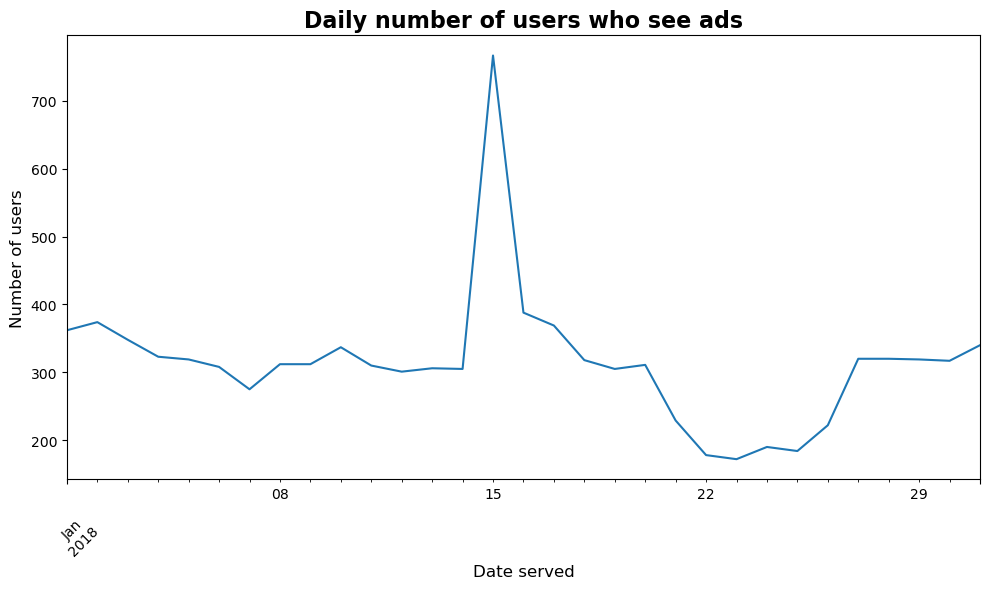

In [116]:
# How many unique users saw our marketing assets each day ??
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

#plotting
plt.figure(figsize=(10, 6)) 
daily_users.plot()

# Annotate
plt.title('Daily number of users who see ads', fontsize=16, fontweight='bold')

plt.xlabel('Date served', fontsize=12)
plt.ylabel('Number of users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- *The 1st half of the month sticks around 300 users per day. However, there's a huge spike in the middle of the month on January 15.*
    - *this may be because we sent out a big marketing email, which reached many users who are not daily visitors of the site.*

## Calculating Metrics

##### Conversion rate of subscribers
  
***People who saw our ads through different channels and became subscribers***
  
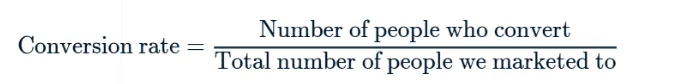

In [117]:
# total unique users
total_users = marketing['user_id'].nunique() 
print(f'No.of unique users: {total_users}')

# total subscribers
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()  
print(f'No. of unique subscribers: {subscribers}')


# conversion rate
conversion_rate = subscribers / total_users
print("The Conversion rate of unique subscribers is:",round(conversion_rate * 100, 2),'%')


No.of unique users: 7309
No. of unique subscribers: 1030
The Conversion rate of unique subscribers is: 14.09 %


##### Retention Rate
***How many subscribers retained as a subscriber?***
  
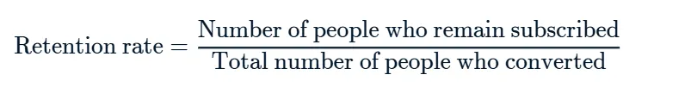

In [118]:
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()  
print(f"No. of subscribers: {subscribers}")

# out of 1030 subscribers, how many retained after a month?
retained_subsc = marketing[(marketing['is_retained']==True) & marketing['converted']==True]['user_id'].nunique()
print(f"No. of retained subscribers: {retained_subsc}")

retention_rate = retained_subsc / subscribers
print(f"Retention Rate of unique subscribers: {retention_rate*100 :.2f}%")

No. of subscribers: 1030
No. of retained subscribers: 696
Retention Rate of unique subscribers: 67.57%


1. What is the retention Rate per channels?

In [119]:
# no. of subscribers per channel "people converted into subscribers"
subscribers_per_channel = marketing[marketing['converted']==True].groupby('subscribing_channel')['user_id'].nunique()

# no.of users retained per channel
users_retianed_per_channel = marketing[marketing['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()

# Retention Rate per channel
channel_retention_rate = users_retianed_per_channel / subscribers_per_channel
print("The retention rates of subscribers per channel are:\n", channel_retention_rate.sort_values(ascending=False))

The retention rates of subscribers per channel are:
 subscribing_channel
Email        0.875776
Push         0.701299
Facebook     0.687783
Instagram    0.681034
House Ads    0.580537
Name: user_id, dtype: float64


2. Since English is the most language displayed by (97.6%) among other languages, what is the conversion rate of users to subscribe after Ads were displayed in English?


In [120]:
# filtering data where the language displayed on ads were in English
english_displayed = marketing[marketing['language_displayed'] == 'English']

# total number of users who saw ads in English
english_displayed_count = english_displayed['user_id'].nunique()
print("Total unique users who saw ads in english:", english_displayed_count)

# Calculate the number of English speakers who converted
English_Ads_subscribers = english_displayed[english_displayed['converted']==True]['user_id'].nunique()
print("Total unique users who converted after they saw ads in english:", English_Ads_subscribers)

# Calculate conversion rate
conversion_rate = English_Ads_subscribers/english_displayed_count
print('conversion rate where Ads were displayed in English:', round(conversion_rate*100,2), '%')

Total unique users who saw ads in english: 7169
Total unique users who converted after they saw ads in english: 941
conversion rate where Ads were displayed in English: 13.13 %


3. What about conversion rate of users to subscrcibe where Ads were displayed by other languages?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Conversion rate of users to subscribe \nby language displayed on Ads ')

Text(0.5, 0, 'Languages')

([0, 1, 2, 3],
 [Text(0, 0, 'Arabic'),
  Text(1, 0, 'English'),
  Text(2, 0, 'German'),
  Text(3, 0, 'Spanish')])

Text(0, 0.5, 'Conversion rate (%)')

(0.0, 1.0)

Text(0, 0.5, 'conv rate=\n50.00%')

Text(1, 0.13125958990096248, 'conv rate=\n13.13%')

Text(2, 0.7162162162162162, 'conv rate=\n71.62%')

Text(3, 0.2, 'conv rate=\n20.00%')

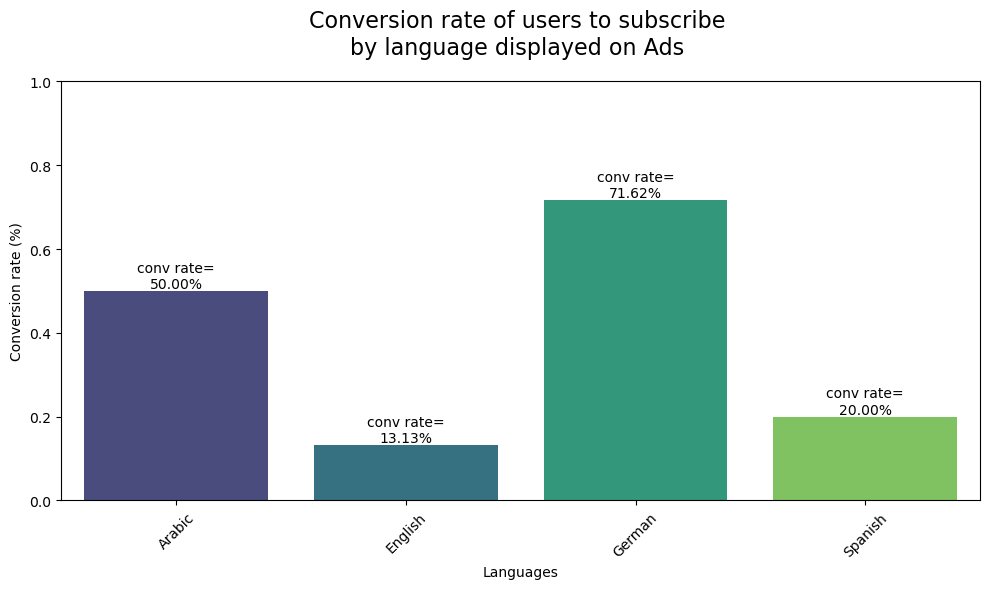

In [121]:
# Group by language_displayed and count unique users
uniqueUsers_per_LangDisp = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
converted_users = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = converted_users / uniqueUsers_per_LangDisp

# plotting
plt.figure(figsize=(10,6))
ax= sns.barplot(x=language_conversion_rate.index, y=language_conversion_rate.values, palette='viridis')
#language_conversion_rate.plot(kind='bar')

plt.title('Conversion rate of users to subscribe \nby language displayed on Ads ', size=16, pad=20)
plt.xlabel('Languages', size=10)
plt.xticks(rotation=45)
plt.ylabel('Conversion rate (%)', size=10)
plt.ylim(0,1)

# value labels above each bar
for i, v in enumerate(language_conversion_rate.values):
    ax.text(i, v, f'conv rate=\n{v*100:.2f}%',ha='center', va='bottom')

plt.tight_layout()
plt.show()

- It seems that German and Arabic have the most conversion rate when displayed on Ads.
- Even though, English was the most language displayed , it had the lowest conversion rate. 
    - *This should be investigated more...*

4. Is there any difference in the conversion rate based on when did the users saw the ads delivered?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date_served', ylabel='conversion_rate'>

Text(0.5, 1.0, 'Daily Conversion Rate for users after seeing Ads')

Text(0, 0.5, 'conversion rate (%)')

Text(0.5, 0, 'Date')

(array([17532., 17536., 17540., 17544., 17548., 17552., 17556., 17560.,
        17563.]),
 [Text(17532.0, 0, '2018-01-01'),
  Text(17536.0, 0, '2018-01-05'),
  Text(17540.0, 0, '2018-01-09'),
  Text(17544.0, 0, '2018-01-13'),
  Text(17548.0, 0, '2018-01-17'),
  Text(17552.0, 0, '2018-01-21'),
  Text(17556.0, 0, '2018-01-25'),
  Text(17560.0, 0, '2018-01-29'),
  Text(17563.0, 0, '2018-02-01')])

(0.0, 26.52653123104912)

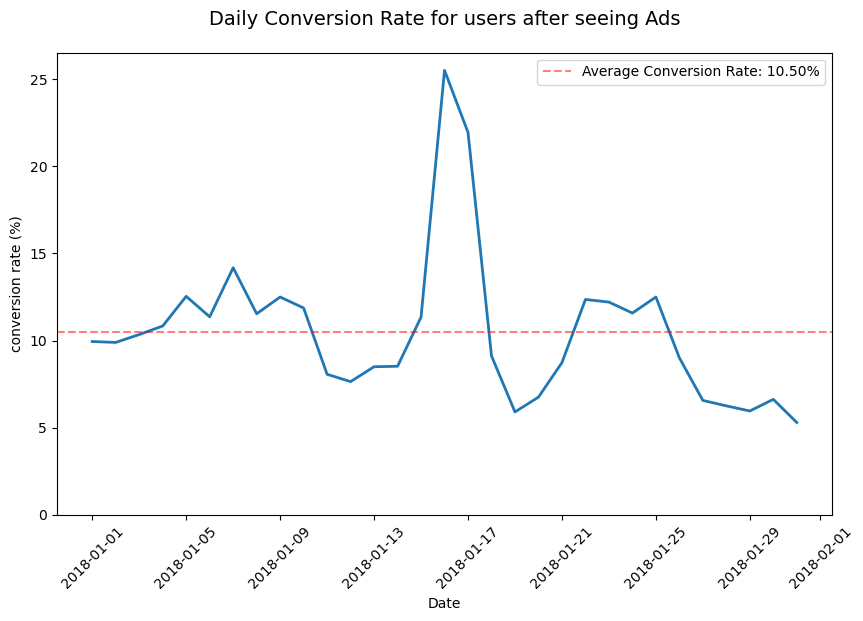

In [122]:
# unique users who saw the delivered Ads per day 
Users_sawAds_per_day = marketing.groupby(['date_served'])['user_id'].nunique()

# unique users who converted after seeing Ads per day
users_converted = marketing[marketing['converted']==True].groupby(['date_served'])['user_id'].nunique()


# convert into a dataframe
conversion_rate = pd.DataFrame({
            'date_served': Users_sawAds_per_day.index,
            'conversion_rate': (users_converted / Users_sawAds_per_day) * 100
        })


# plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=conversion_rate, 
                x='date_served', 
                y='conversion_rate',
                linewidth=2)

# Calculate and show average conversion rate
avg_conversion_rate = conversion_rate['conversion_rate'].mean()
plt.axhline(avg_conversion_rate, 
            color='r', 
            linestyle='--', 
            alpha=0.5,
            label=f'Average Conversion Rate: {avg_conversion_rate:.2f}%')
    
plt.legend()


plt.title('Daily Conversion Rate for users after seeing Ads', size=14, pad=20)
plt.ylabel('conversion rate (%)', size=10)
plt.xlabel('Date', size=10)
plt.xticks(rotation=45)
plt.ylim(0)

plt.show()

- The conversion rate shows significant daily fluctuations
- There's a notable spike in the middle of the month "January 15" 
    - that maybe becuase of special offers or events 
- A declining trend is observed in the last 5 days

5. What about weekly conversion rate based on when did the users saw the ads delivered?

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='day_served', ylabel='conversion_rate'>

Text(0.5, 1.0, 'Weekly Conversion Rate for Users that Subscribed After Seeing Ads')

Text(0, 0.5, 'Conversion Rate (%)')

Text(0.5, 0, 'Day Served')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

(0.0, 14.530152153148668)

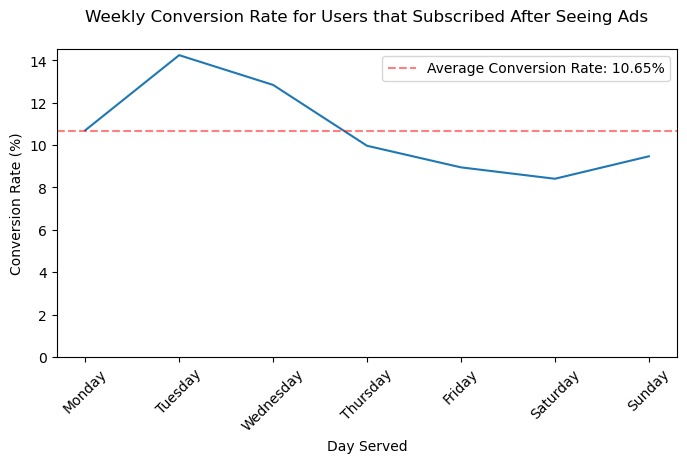

In [123]:
# Unique users who saw the delivered Ads per day 
Users_sawAds_per_week = marketing.groupby(['DoW_served', 'day_served'])['user_id'].nunique()   

# Unique users who converted after seeing Ads per day
users_converted = marketing[marketing['converted'] == True].groupby(['DoW_served', 'day_served'])['user_id'].nunique()

# Convert into a DataFrame
conversion_rate = pd.DataFrame({
    'conversion_rate': (users_converted / Users_sawAds_per_week) * 100
}).reset_index()

# Sort the DataFrame by DoW_served
conversion_rate = conversion_rate.sort_values('DoW_served')

# Plotting
plt.figure(figsize=(8, 4))
sns.lineplot(data=conversion_rate, 
             x='day_served',  # Use the day names for the x-axis
             y='conversion_rate',
             palette='viridis')

# Calculate and show average conversion rate
avg_conversion_rate = conversion_rate['conversion_rate'].mean()
plt.axhline(avg_conversion_rate, 
            color='r', 
            linestyle='--', 
            alpha=0.5,
            label=f'Average Conversion Rate: {avg_conversion_rate:.2f}%')
    
plt.legend()

plt.title('Weekly Conversion Rate for Users that Subscribed After Seeing Ads', size=12, pad=20)
plt.ylabel('Conversion Rate (%)', size=10)
plt.xlabel('Day Served', size=10)
plt.xticks(rotation=45)
plt.ylim(0)

plt.show()

### 1. Daily language preferences

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date_served'>

Text(0.5, 1.0, 'Daily language preferences')

Text(0.5, 0, 'Date served')

(array([17532., 17536., 17540., 17544., 17548., 17552., 17556., 17560.,
        17563.]),
 [Text(17532.0, 0, '2018-01-01'),
  Text(17536.0, 0, '2018-01-05'),
  Text(17540.0, 0, '2018-01-09'),
  Text(17544.0, 0, '2018-01-13'),
  Text(17548.0, 0, '2018-01-17'),
  Text(17552.0, 0, '2018-01-21'),
  Text(17556.0, 0, '2018-01-25'),
  Text(17560.0, 0, '2018-01-29'),
  Text(17563.0, 0, '2018-02-01')])

Text(0, 0.5, 'Total Unique Users')

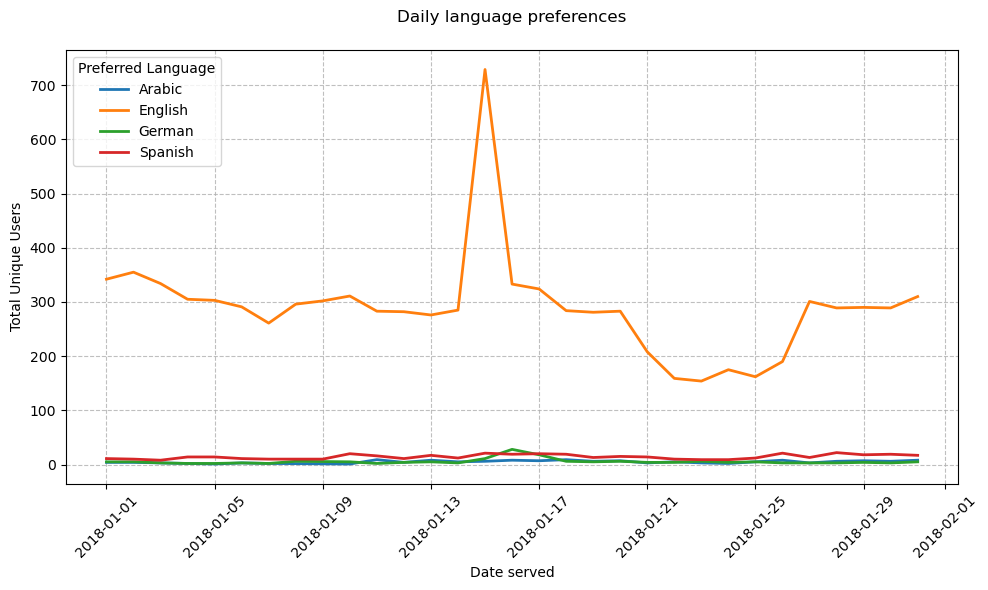

In [124]:
# no. of users for each preferred language on each date
languageseries = marketing.groupby(['date_served', 'language_preferred'])['user_id'].nunique()

# convert the data into a dataframe and unstack by language preferred  
language_df = pd.DataFrame(languageseries.unstack(level=1))
language_df.head()

# plotting
plt.figure(figsize=(10,6))
sns.lineplot(language_df, linewidth=2, dashes=False, markers=False)

plt.title('Daily language preferences', size=12, pad=20)
plt.xlabel('Date served', size=10)
plt.xticks(rotation=45)
plt.ylabel('Total Unique Users', size=10)

plt.grid(True, linestyle='--', alpha=0.8)

plt.legend(title='Preferred Language',
          loc='upper left')

plt.tight_layout()
plt.show()

- by far the most popular language is english

### 2. Language preferences by age group

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,16,18,16,12,13,14,17
English,1126,1218,1121,978,993,978,922
German,24,23,29,12,14,20,9
Spanish,43,51,54,57,39,47,34


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Language preferences by age group')

Text(0.5, 0, 'Language')

Text(0, 0.5, 'Users')

<Figure size 1200x800 with 0 Axes>

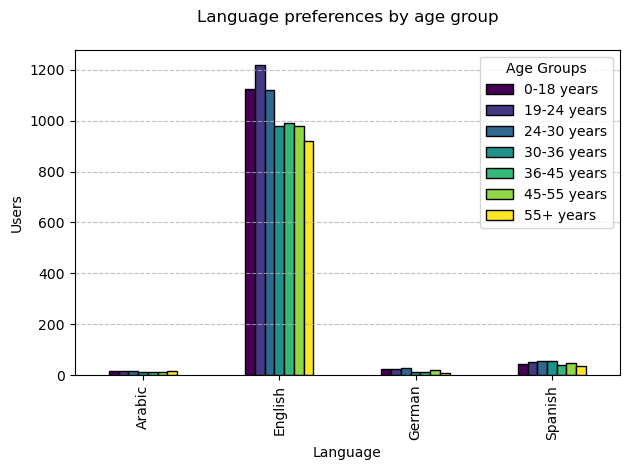

In [125]:
language_age = marketing.groupby(['language_preferred', 'age_group'])['user_id'].nunique()
language_age_df = pd.DataFrame(language_age.unstack(level=1))
language_age_df

#plotting
plt.figure(figsize=(12,8))
ax= language_age_df.plot(kind='bar', colormap='viridis', edgecolor= 'black', linewidth=1)

plt.title('Language preferences by age group', size= 12, pad=20)
plt.xlabel('Language', size=10)
plt.ylabel('Users', size=10)
plt.legend(
    title = 'Age Groups',
    loc= 'upper right'
    )
plt.grid(axis='y', 
         linestyle='--', 
         alpha=0.8)

plt.tight_layout()
plt.show()


### 3. Marketing channels used by age group

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Marketing channels by age group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Users')

<Figure size 1200x800 with 0 Axes>

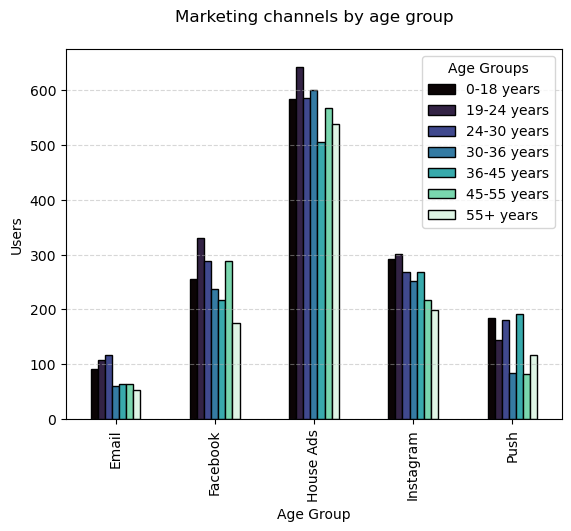

In [126]:
channel_by_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].nunique()

channel_by_age_df = pd.DataFrame(channel_by_age.unstack(level = 1))

# Plot channel_by_age
plt.figure(figsize=(12,8))
ax= channel_by_age_df.plot(kind='bar', colormap='mako', edgecolor= 'black', linewidth=1)

plt.title('Marketing channels by age group', size= 12, pad=20)
plt.xlabel('Age Group', size=10)
plt.ylabel('Users', size=10)

plt.legend(
    title="Age Groups",
    loc = 'upper right')

plt.grid(axis='y', 
         linestyle='--', 
         alpha=0.5)

plt.show()

- users aged between 19-24 years old are seeing our Ads more through House Ads, Facebook, and Instagram
- emails are not reaching older users above 30

# Automating repetitive tasks

### 1. Retention Rate Function

In [127]:
# this func allows users to input a dataframe and a list of cols?
def retention_rate(dataframe, column_names):
    users_retained = marketing[marketing['is_retained']== True].groupby(column_names)['user_id'].nunique()
    users_subscribed = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

    retention_rate = users_retained / users_subscribed
    retention_rate = retention_rate.fillna(0)

    return pd.DataFrame(retention_rate.unstack(level=1))


In [128]:
date_subs_per_channel = retention_rate(marketing, ['date_subscribed', 'subscribing_channel'])
date_subs_per_channel.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,0.00,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.50,0.666667,0.466667,0.500000,0.000000
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


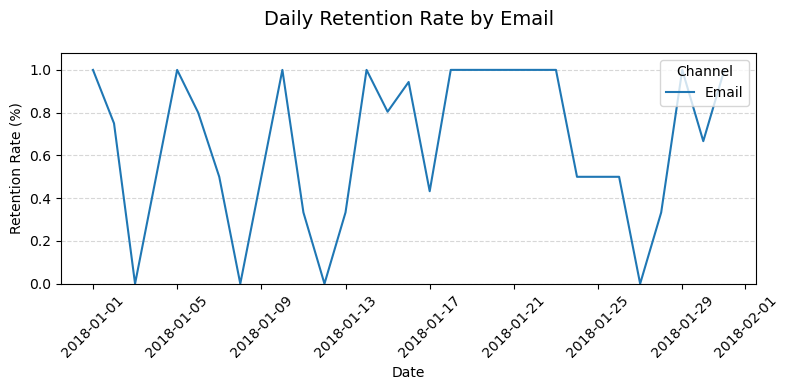

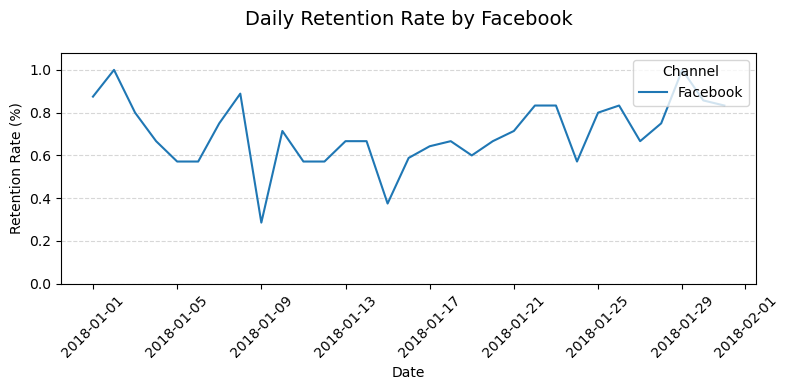

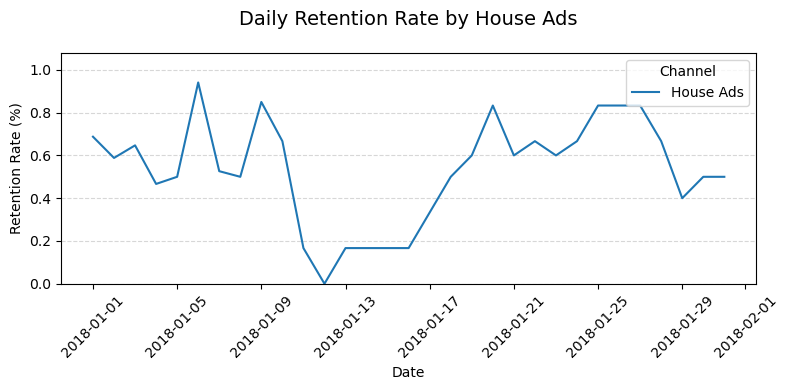

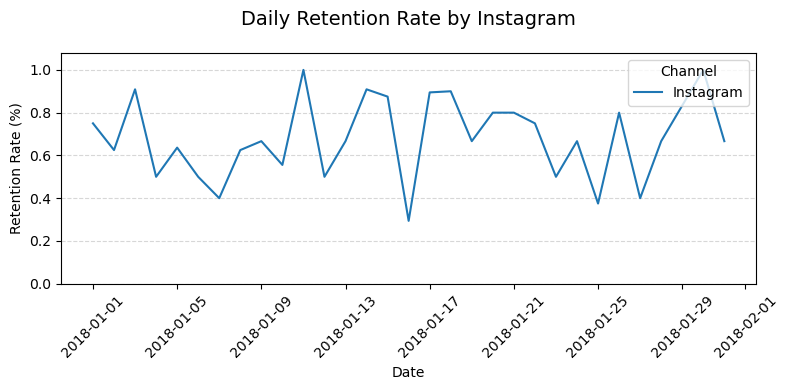

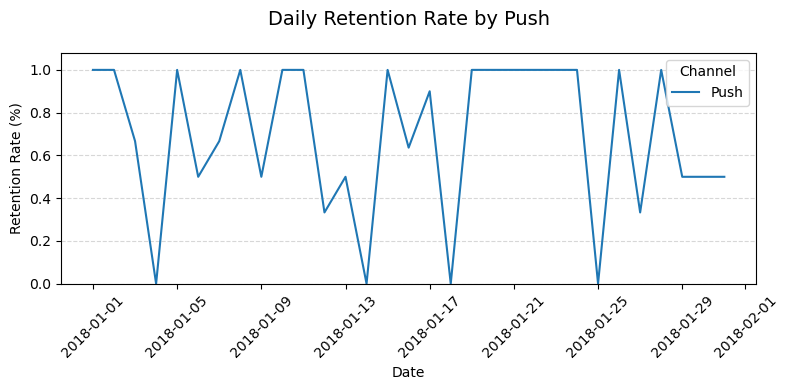

In [129]:
def plotting_RetentionRate(dataframe):
    for column in dataframe:
        plt.figure(figsize=(8,4))
        plt.plot(dataframe.index, dataframe[column], label=column)
        plt.title('Daily Retention Rate by ' + column, size=14, pad=20)

        plt.ylabel("Retention Rate (%)", size = 10)
        plt.xlabel("Date", size = 10)
        plt.xticks(rotation=45)
        plt.legend(title='Channel', loc='upper right')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.ylim(0, 1.08)
        plt.tight_layout()
        plt.show()


        
plotting_RetentionRate(date_subs_per_channel)

## 2. Conversion Rate Function

In [130]:
def conversion_rate(dataframe, column_names):

    users_converted = marketing[marketing['converted']==True].groupby(column_names)['user_id'].nunique()
    total_unique_users = marketing.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = users_converted/total_unique_users
    conversion_rate = conversion_rate.fillna(0)

    # Ensure we have a MultiIndex for unstacking the DataFrame when we have just 1 column specified in the list of column_names
    if len(column_names) == 1:
        conversion_rate.index = pd.MultiIndex.from_product([conversion_rate.index, ['converted']])
    
    return pd.DataFrame(conversion_rate.unstack(level=1))

In [131]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_conv.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


In [132]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_conv.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


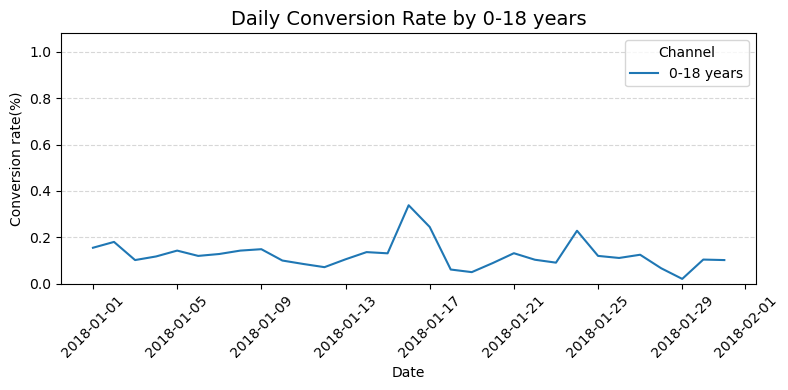

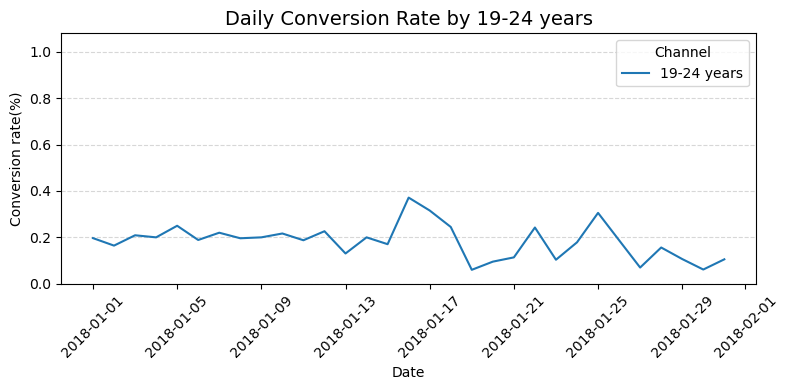

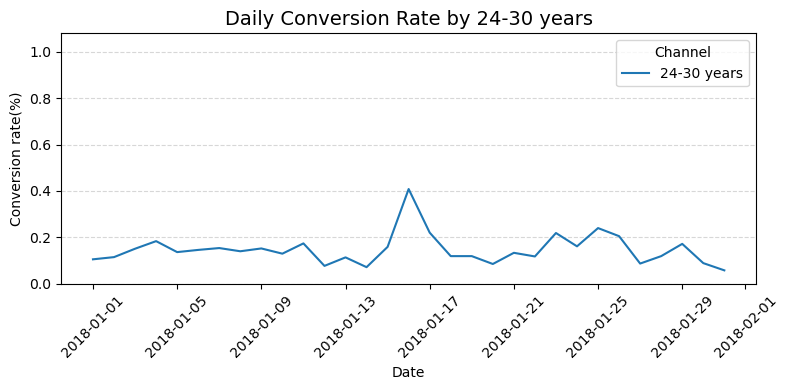

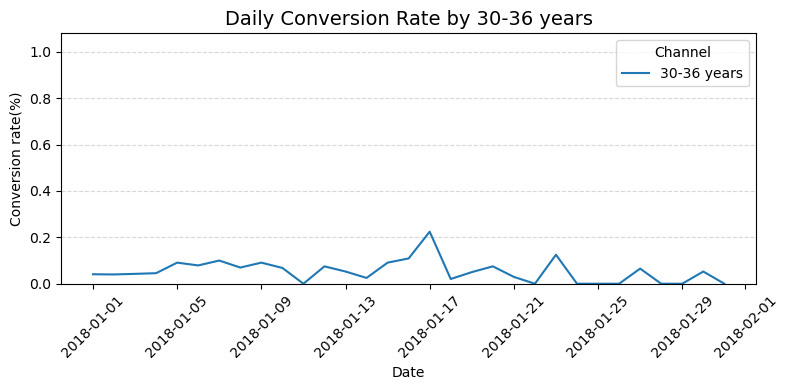

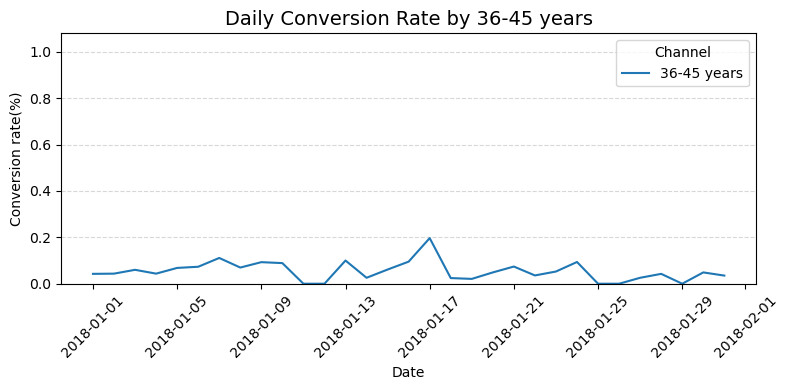

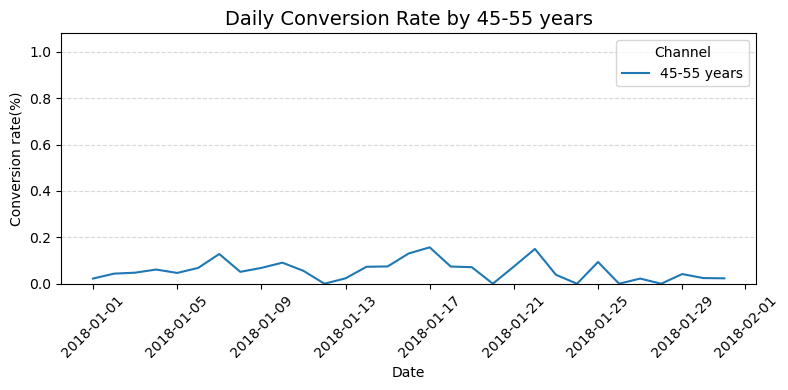

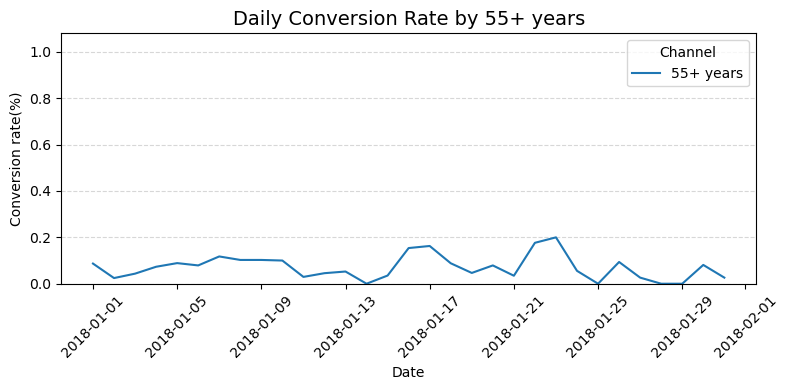

In [133]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.figure(figsize=(8,4))
        plt.plot(dataframe.index, dataframe[column], label=column)

        plt.title('Daily Conversion Rate by ' + column, size = 14)
        plt.ylabel('Conversion rate(%)', size = 10)
        plt.xlabel('Date', size = 10)
        
        plt.xticks(rotation=45)
        plt.legend(title='Channel', loc='upper right')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.ylim(0,1.08)
        plt.tight_layout()
        plt.show()  

        
plotting_conv(age_group_conv)

- There's a large peak on January 15 for all users, becuase of sending more Ads that a lot of users saw.

Daily Conversion rate by marketing channels

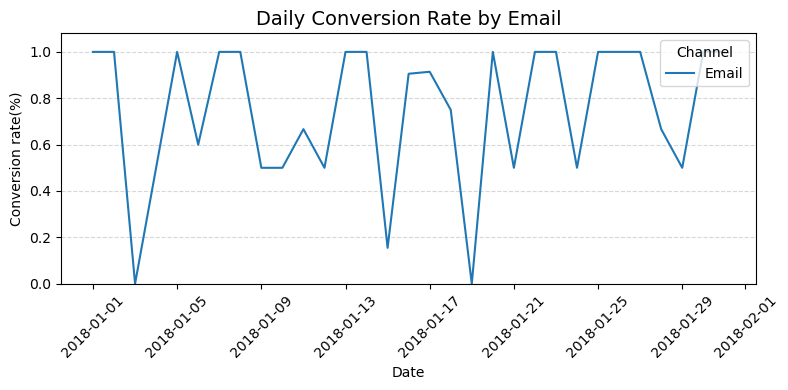

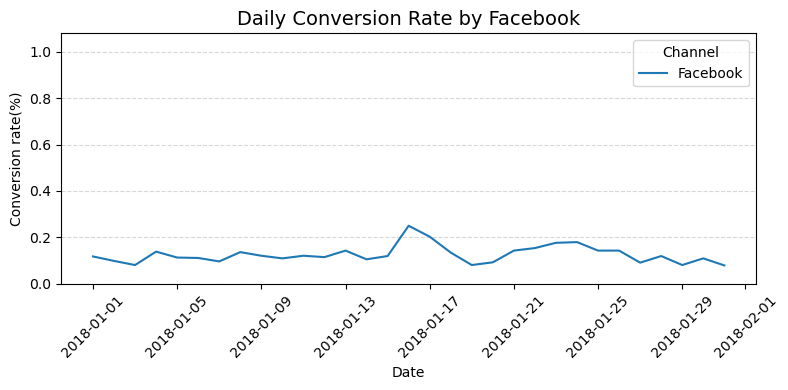

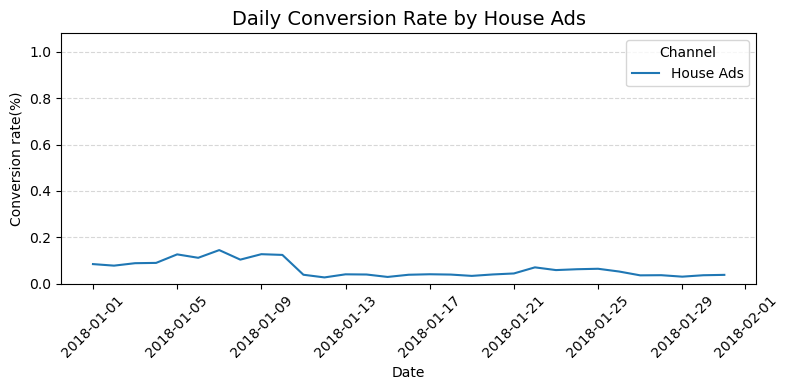

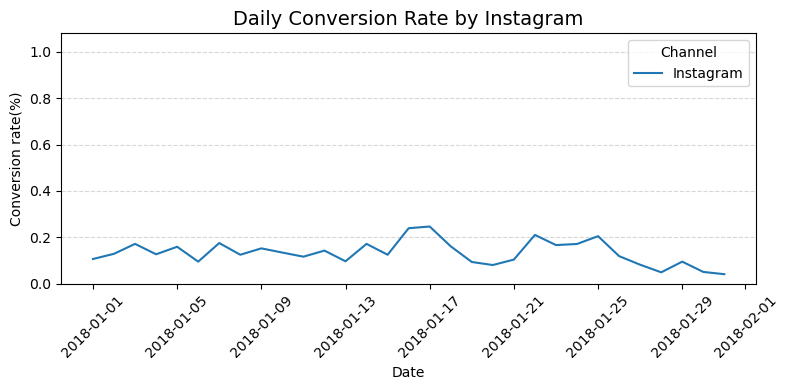

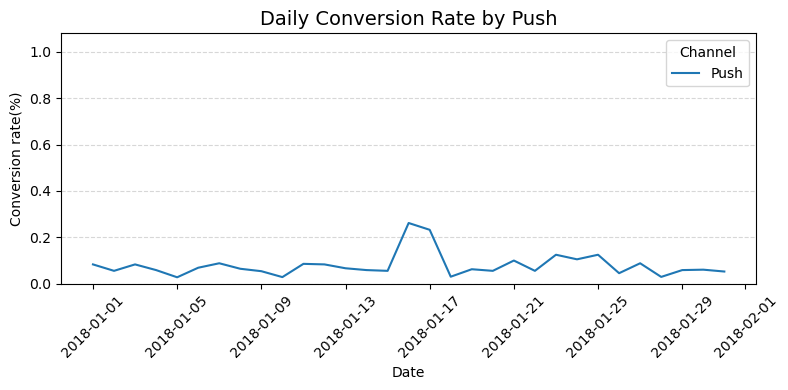

In [134]:
# Calculate daily conversion rate by marketing channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)


- Even though House Ads is considered to be the most delivered marketing channel with 47.2% out of all the other channels, it has a sudden conversion rate decrease almost to none

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='day_served'>

Text(0.5, 1.0, 'Weekly Conversion Rate by Marketing Channel')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Conversion Rate')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Sunday'),
  Text(0.0, 0, 'Monday'),
  Text(1.0, 0, 'Tuesday'),
  Text(2.0, 0, 'Wednesday'),
  Text(3.0, 0, 'Thursday'),
  Text(4.0, 0, 'Friday'),
  Text(5.0, 0, 'Saturday'),
  Text(6.0, 0, 'Sunday'),
  Text(7.0, 0, '')])

<Figure size 1200x600 with 0 Axes>

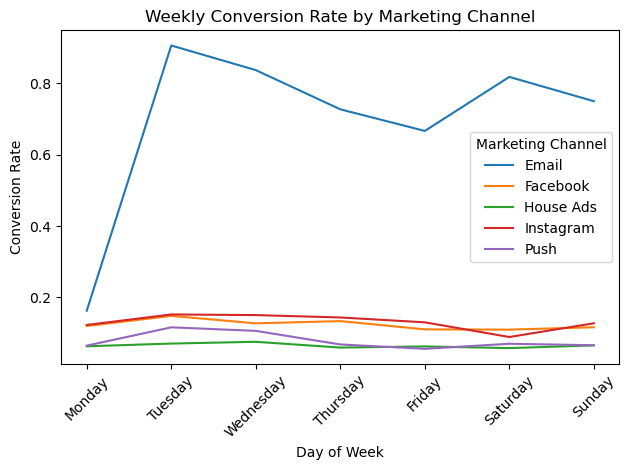

In [135]:
# conversion rate by dayofweek served
day_served_convRate = conversion_rate(marketing, ['day_served', 'marketing_channel'])

# Reset index to make 'day_served' a column
day_served_convRate = day_served_convRate.reset_index()

# Create a dictionary mapping 'day_served' to 'DoW_served'
day_to_dow = marketing[['day_served', 'DoW_served']].drop_duplicates().set_index('day_served')['DoW_served'].to_dict()

# Add 'DoW_served' column in the variable of day_served_convRate
day_served_convRate['DoW_served'] = day_served_convRate['day_served'].map(day_to_dow)

# Sort by 'DoW_served'
DOW_served_convRate = day_served_convRate.sort_values('DoW_served')

# Set 'day_served' as index again for plotting
DOW_served_convRate = DOW_served_convRate.set_index('day_served')


# Plotting
plt.figure(figsize=(12, 6))
DOW_served_convRate.drop('DoW_served', axis=1).plot(kind='line')
plt.title('Weekly Conversion Rate by Marketing Channel')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate')
plt.legend(title='Marketing Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Investigating just "House Ads" on date served and language displayed

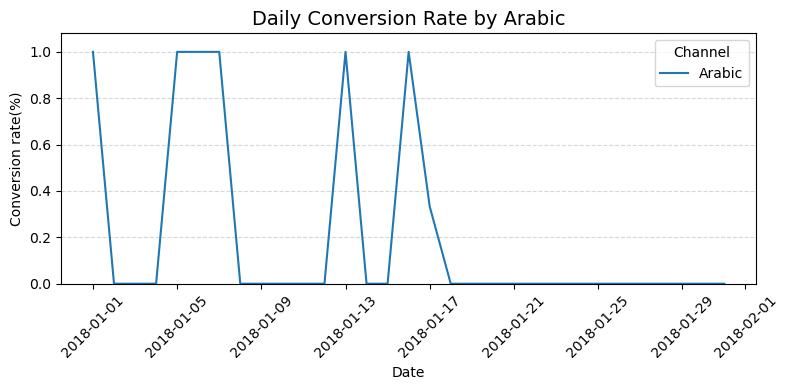

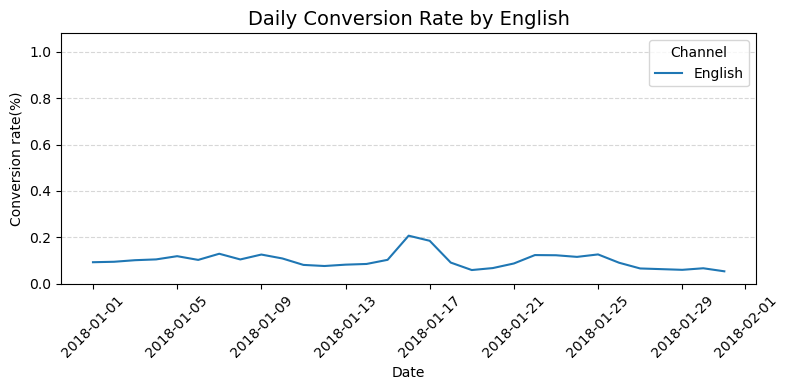

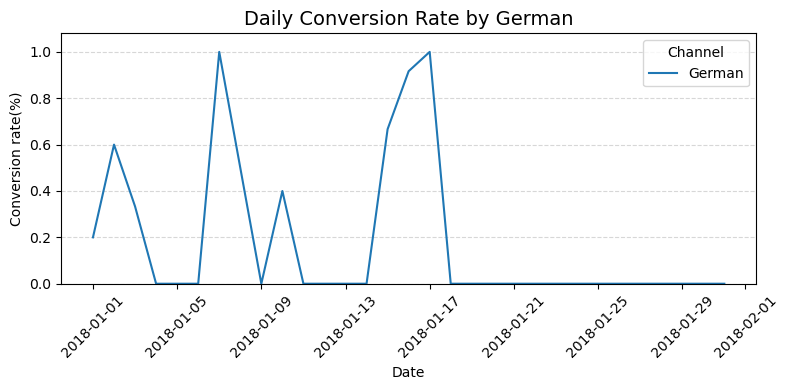

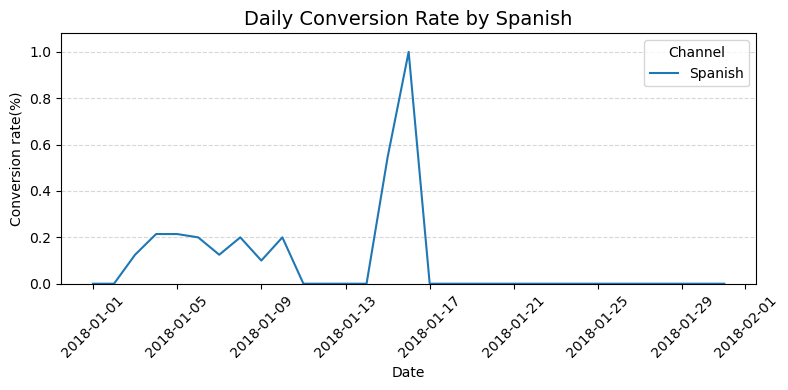

In [136]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served','language_displayed']).fillna(0)


# Use your plotting function to display results
plotting_conv(conv_lang_channel)

- It seems like there is no ads served in other languages for the last 2 weeks period except for English.
- We've a 100% conversion rates for other languages except for English that has a very low conversion rate.
- So, it looks like there's a ***language problem***, and I should identify what the problem is specifically, so that the team doesn't repeat their mistake.

#### Did we deliver Ads in the right language for users?

is_correct_lang,No,Yes,correct_language_delivered_pct
date_served,,,
2018-01-01,2.0,189.0,0.989529
2018-01-02,3.0,247.0,0.988000
2018-01-03,0.0,220.0,1.000000
2018-01-04,0.0,168.0,1.000000
2018-01-05,0.0,160.0,1.000000


(array([17532., 17536., 17540., 17544., 17548., 17552., 17556., 17560.,
        17563.]),
 [Text(17532.0, 0, '2018-01-01'),
  Text(17536.0, 0, '2018-01-05'),
  Text(17540.0, 0, '2018-01-09'),
  Text(17544.0, 0, '2018-01-13'),
  Text(17548.0, 0, '2018-01-17'),
  Text(17552.0, 0, '2018-01-21'),
  Text(17556.0, 0, '2018-01-25'),
  Text(17560.0, 0, '2018-01-29'),
  Text(17563.0, 0, '2018-02-01')])

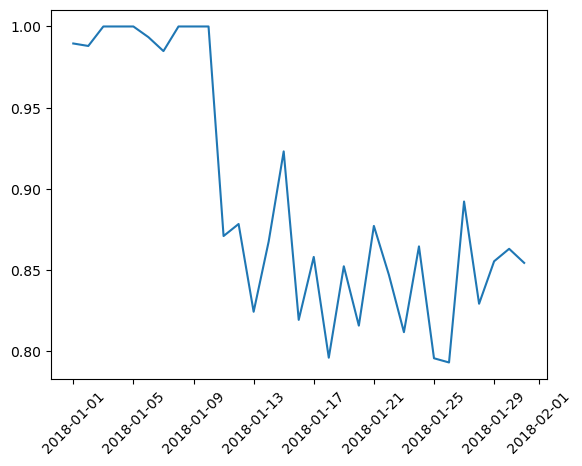

<Figure size 640x480 with 0 Axes>

In [137]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'],'Yes','No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Divide the count where language is correct by the row sum
language_check_df['correct_language_delivered_pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)
language_check_df.head()

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['correct_language_delivered_pct'])
plt.xticks(rotation=45)
plt.show()
plt.clf()

<u>a dip in conversion rates for House Ads was found:</u> 
- It appears that the problem was that users were seeing ads in languages other than there preferred language.

### How many subscribers did we lost due to this bug?

1. What are the Conversion Rates for House Ads channel before January 11 ?

In [138]:
# Calculate pre-error conversion rate

house_ads = marketing[marketing['marketing_channel'] == 'House Ads']
house_ads_prebug = house_ads[house_ads['date_served'] < '2018-01-11']  # filter for date_served before the bug occurred on January 11
convRate_language = conversion_rate(house_ads_prebug, ['language_displayed'])
convRate_language


,converted
language_displayed,
Arabic,0.500000
English,0.131260
German,0.716216
Spanish,0.200000


In [139]:
# Indexing other language conversion rate against English
spanish_index_PreBug = convRate_language.loc['Spanish','converted']/convRate_language.loc['English','converted']
arabic_index_PreBug = convRate_language.loc['Arabic','converted']/convRate_language.loc['English','converted']
german_index_PreBug = convRate_language.loc['German','converted']/convRate_language.loc['English','converted']


print(f"Spanish speaking users typically convert at a rate {round(spanish_index_PreBug, 2)} times higher than the rate of English speakers.")
print(f"Arabic speaking users typically convert at a rate {round(arabic_index_PreBug, 2)} times higher than the rate of English speakers.")
print(f"German speaking users typically convert at a rate {round(german_index_PreBug, 2)} times higher than the rate of English speakers.")

Spanish speaking users typically convert at a rate 1.52 times higher than the rate of English speakers.
Arabic speaking users typically convert at a rate 3.81 times higher than the rate of English speakers.
German speaking users typically convert at a rate 5.46 times higher than the rate of English speakers.


2. what was the *expected conversion rate* during the rest of the month?

In [140]:
# This DataFrame will include how many users PREFER each language by day.
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                    .agg({'user_id':'nunique',
                          'converted':'sum'
                          })

# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))
converted.head(15)

'''The dataframe describes:
    1. the number of unique users who should have seen ads by their preferred language, 
    2. how many of will convert each day.
'''

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0  
2018-01-06             2.0  
2018-01-07             1.0  
2018-01-08             2.0  
2018-01-09             1.0  
2018-01-10             4.0  
2018-01-11             0.0  
2018-01-12             1.0  
2018-01-13             0.0  
2018-01-14             0.0  
2018-01-15             0.0

'The dataframe describes:\n    1. the number of unique users who should have seen ads by their preferred language, \n    2. how many of will convert each day.\n'

In [141]:
converted['english_convRate_afterBug'] = converted.loc['2018-01-11':'2018-01-31'][('converted', 'English')]
converted.head(15)
'''A column of "english_conv_rate" was added to the df that will estimate: the daily conversion rates that should have been if users were being served the correct language.
'''

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   

                           english_convRate_afterBug  
language_preferred Spanish                            
date_served                                           
2018-01-01             0.0                       NaN  
2018-01-02             0.0                       NaN  
2018-01-03             1.0                       NaN  
2018-01-04             3.0                       NaN  
2018-01-05             3.0                       NaN  
2018-01-06             2.0                       NaN  
2018-01-07             1.0                       NaN  
2018-01-08             2.0                       NaN  
2018-01-09             1.0                       NaN  
2018-01-10             4.0                       NaN  
2018-01-11             0.0                       6.0  
2018-01-12             1.0                       3.0  
2018-01-13             0.0                       5.0  
2018-01-14             0.0                       6.0  
2018-01-15             0.0                       6.0

'A column of "english_conv_rate" was added to the df that will estimate: the daily conversion rates that should have been if users were being served the correct language.\n'

In [142]:
# Create expected conversion rates for each language
converted['expected_spanish_ConvRate'] = converted['english_convRate_afterBug'] * spanish_index_PreBug * converted[('user_id', 'Spanish')] / 100
converted['expected_arabic_ConvRate'] = converted['english_convRate_afterBug'] * arabic_index_PreBug * converted[('user_id', 'Arabic')] / 100
converted['expected_german_ConvRate'] = converted['english_convRate_afterBug'] * german_index_PreBug * converted[('user_id', 'German')] / 100

converted.head(15)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   
2018-01-06             3.0   136.0    2.0    11.0       3.0    12.0    0.0   
2018-01-07             2.0   117.0    2.0    10.0       2.0    14.0    2.0   
2018-01-08             NaN   138.0    6.0    10.0       NaN    11.0    3.0   
2018-01-09             NaN   147.0    NaN    10.0       NaN    19.0    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN    15.0    2.0   
2018-01-11             7.0   133.0    2.0    13.0       0.0     6.0    0.0   
2018-01-12             3.0   129.0    4.0    11.0       0.0     3.0    0.0   
2018-01-13             6.0   121.0    5.0    16.0       0.0     5.0    1.0   
2018-01-14             5.0   131.0    3.0    12.0       0.0     6.0    0.0   
2018-01-15             2.0   189.0    4.0    10.0       0.0     6.0    0.0   

                           english_convRate_afterBug  \
language_preferred Spanish                             
date_served                                            
2018-01-01             0.0                       NaN   
2018-01-02             0.0                       NaN   
2018-01-03             1.0                       NaN   
2018-01-04             3.0                       NaN   
2018-01-05             3.0                       NaN   
2018-01-06             2.0                       NaN   
2018-01-07             1.0                       NaN   
2018-01-08             2.0                       NaN   
2018-01-09             1.0                       NaN   
2018-01-10             4.0                       NaN   
2018-01-11             0.0                       6.0   
2018-01-12             1.0                       3.0   
2018-01-13             0.0                       5.0   
2018-01-14             0.0                       6.0   
2018-01-15             0.0                       6.0   

                   expected_spanish_ConvRate expected_arabic_ConvRate  \
language_preferred                                                      
date_served                                                             
2018-01-01                               NaN                      NaN   
2018-01-02                               NaN                      NaN   
2018-01-03                               NaN                      NaN   
2018-01-04                               NaN                      NaN   
2018-01-05                               NaN                      NaN   
2018-01-06                               NaN                      NaN   
2018-01-07                               NaN                      NaN   
2018-01-08                               NaN                      NaN   
2018-01-09                               NaN                      NaN   
2018-01-10                               NaN                      NaN   
2018-01-11                          1.188485                 1.599883   
2018-01-12                          0.502820                 0.342832   
2018-01-13                          1.218959                 1.142774   
2018-01-14                          1.097063                 1.142774   
2018-01-15                          0.914219                 0.457109   

                   expected_german_ConvRate  
language_preferred                           
date_served                                  
2018-01-01                              NaN  
2018-01-02                              NaN  
2018-01-03                              NaN  
2018-01-04    

In [143]:
# filter the datadrame of "converted" to include where date is between 11/01/2018 and 31/01/2018
converted = converted.loc['2018-01-11':'2018-01-31']


expected_Users_to_convert = converted['expected_spanish_ConvRate'].sum() + converted['expected_arabic_ConvRate'].sum() + converted['expected_german_ConvRate'].sum()
print("Expected users to convert as a subscriber after recieving an Ad with their preferred language: ", round(expected_Users_to_convert))


actual_converted_Users = converted[('converted', 'Spanish')].sum() + converted[('converted', 'Arabic')].sum() + converted[('converted', 'German')].sum()
print("Actual Subscribers:", round(actual_converted_Users))


lost_subscribers = expected_Users_to_convert - actual_converted_Users

print("Lost Subscribers because of delievring ads in the wrong language: ", round(lost_subscribers))


Expected users to convert as a subscriber after recieving an Ad with their preferred language:  54
Actual Subscribers: 26
Lost Subscribers because of delievring ads in the wrong language:  28


# A/B Test
The focus of our test will be that:
  
> half of the emails sent were generic "control", while the other half contained "personalized" messaging to the users, and the users in these groups were chosen randomly.
  
> To evaluate which variant performs better, "Control" or "Personalized" Emails. we'll utilize the A/B Test so that we will be confident that the increase in our metrics were due to the action we took with our hypothesis.
  

<u>Control Emails</u>: 
- have a generic Content: These emails contain the same content for all recipients, without any customization.

<u>Personalized Emails</u>: 
- have a customized Content: These emails are tailored to the recipient’s preferences, behaviors, or past interactions.

1. Test Allocation: *"group and personlaized emails"*
  
How many users were allocated to each test of email? were they equally randomized and if not, is it a significant difference?


variant
control            270
personalization    284
Name: user_id, dtype: int64

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Email unique users by email variant ')

Text(0.5, 0, 'Email variant')

Text(0, 0.5, 'Total Unique Users')

(array([0, 1]), [Text(0, 0, 'control'), Text(1, 0, 'personalization')])

Text(0, 270, '270')

Text(1, 284, '284')

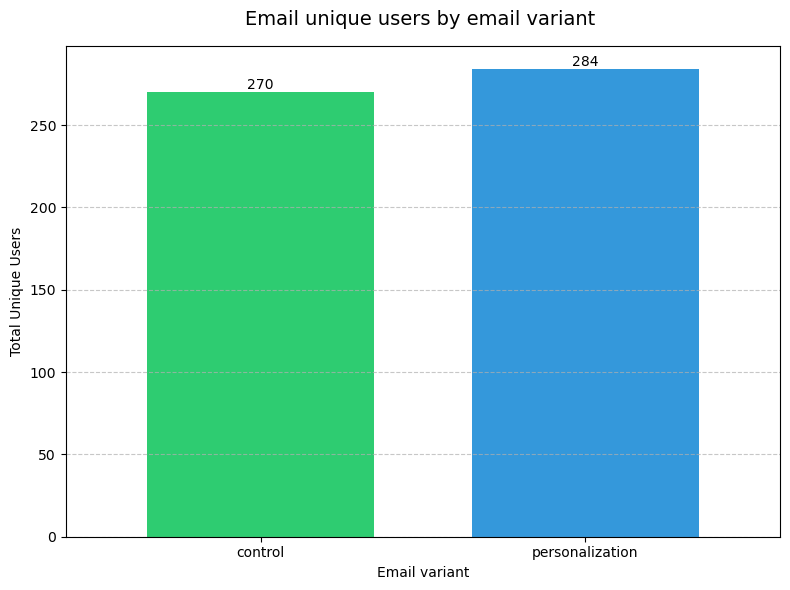

In [157]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

# Group the email DataFrame by variant 
n_users_by_emailvariant = email.groupby('variant')['user_id'].nunique()
n_users_by_emailvariant


# Plot channel_by_age
plt.figure(figsize=(8,6))
ax= n_users_by_emailvariant.plot(kind='bar', color=['#2ecc71', '#3498db'], width=0.7)

plt.title('Email unique users by email variant ', size= 14, pad=15)
plt.xlabel('Email variant', size=10)
plt.ylabel('Total Unique Users', size=10)
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(n_users_by_emailvariant):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

*There's a slight difference in allocation, but it's within the expected range so you can continue with your analysis.*
  
- The expected range for user allocation in A/B testing typically falls between (50/50) and (e.g., 70/30) distributions.

2. Which test has the better conversion rate?

In [164]:
# Group by user_id and variant, then get the higher group of
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()  # to get converted users since converted column is boolean
subscribers = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control and personalization columns
control = subscribers['control'].dropna()    # we used drop instead of filing nulls with 0 to not bias our conversion rate
personalization = subscribers['personalization'].dropna()


print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))


if  np.mean(control) < np.mean(personalization):
    print('\nThe conversion rate of peronalization group is relatively higher than the control group.')
else:
    print('\nThe conversion rate of control group is relatively higher than the personalization group.')

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352

The conversion rate of peronalization group is relatively higher than the control group.


3. What is the relative percent in difference between personalization and control?
  
using Lift method: where treatment here is for personalization
  
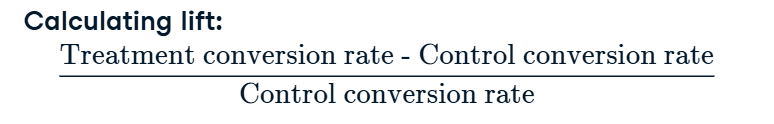

In [160]:
def lift(a,b):
    # calculate the lift
    a_mean = np.mean(a)
    b_mean = np.mean(b)

    lift = (b_mean - a_mean) / a_mean
    return str(round(lift * 100, 2)) + "%"
print("The relative difference between personalization and generic control email is: ", lift(control, personalization))


The relative difference between personalization and generic control email is:  38.85%


4. using t-test as our statistical test to compare the means of two groups, and to answer these questions:
  
- Is the relative difference between the personalization and generic control of 38.85% statistically significant?*
  
- *was the statistical significanct result by chance or was it a true difference between the variants?*

In [161]:
control_num = control.astype(int)
personalization_num = personalization.astype(int)

t_stats, p_value = ttest_ind(control_num, personalization_num)

print(f'T-statistic: {t_stats}, \np-value: {p_value}')

alpha= 0.05
if p_value < alpha:
    print('There is statistical difference between control and personalized groups')
else:
    print('there is no statistical difference between control and personalized  groups')

T-statistic: -2.734329944750507, 
p-value: 0.0064514878446941815
There is statistical difference between control and personalized groups


- However, we can't just assume that the the personalization is effective for everyone 
- Not all customers are alike! It is important to break down results by various demographics in order to obtain a holistic understanding of the impact of the test. 

In [166]:
for language in np.unique(marketing['language_displayed'].values):  # ---> for each language in language_displayed: ['Arabic', 'English', 'German', 'Spanish']
    print(language)

    # filtering by email as the marketing channel and break down each language_displayed
    language_Email_data = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed'] == language)]

    # group users who converted by each test "control" and "personalization"
    subscribers_converted = language_Email_data.groupby(['user_id', 'variant'])['converted'].max() 
    subscribers_converted = pd.DataFrame(subscribers_converted.unstack(level=1))
    
    # ensure that there is no null values to avoid bias while calculating the means in the lift function
    control = subscribers_converted['control'].dropna()
    personalization = subscribers_converted['personalization'].dropna()

    print("lift: There is a relative difference by", lift(control, personalization))
    print("t-statistic:", ttest_ind(control_num, personalization_num),  "\n\n")


Arabic
lift: There is a relative difference by 50.0%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


English
lift: There is a relative difference by 39.0%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


German
lift: There is a relative difference by -1.62%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


Spanish
lift: There is a relative difference by 166.67%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 




In [171]:
def AB_test_EmailSegmentation_by(segment):
    for subsegment in np.unique(marketing[segment].values):
        print(subsegment)

        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1))
        
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print("lift:", lift(control, personalization))
        print("t-statistic:", ttest_ind(control_num, personalization_num),"\n")

what is the effictivness of receiving personalized emails by language displayed?

In [168]:
AB_test_EmailSegmentation_by('language_displayed')

Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


English
lift: 39.0%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


German
lift: -1.62%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 




<u>Insights found:</u>
- *It seems that Personalization emails wasn't effective for German people.*

Then what about the effectivness recieving a personalized emails by age groups?

In [169]:
AB_test_EmailSegmentation_by('age_group')

0-18 years
lift: 121.4%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


19-24 years
lift: 106.24%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


24-30 years
lift: 161.19%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


30-36 years
lift: -100.0%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


36-45 years
lift: -85.23%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


45-55 years
lift: -72.22%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 


55+ years
lift: -100.0%
t-statistic: TtestResult(statistic=-2.734329944750507, pvalue=0.0064514878446941815, df=552.0) 




<u>Insights found:</u>:
  
*personalization was extremely effective than the generic control for younger groups but less effective for older groups.* 
  
- One explanation might be that younger users understand how their data might be used online and think personalization is cool giving them more insights about themselves
- while older people might feel that this is a violation of their privacy.